# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mouse_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
n_mice = combined_mouse_df["Mouse ID"].nunique()
n_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupeID_timept = combined_mouse_df[combined_mouse_df[['Mouse ID','Timepoint']].duplicated() == True]
dupeID_timept.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupeID = combined_mouse_df[combined_mouse_df[['Mouse ID']].duplicated() == True]
dupeID.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#sort by "Mouse ID"
cleaned_mouse_df=  combined_mouse_df.sort_values(["Mouse ID"])
cleaned_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
1295,a203,25,56.793208,1,Infubinol,Female,20,23
1675,a203,40,63.593490,2,Infubinol,Female,20,23
1577,a203,35,61.931650,2,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1143,z969,25,63.145652,2,Naftisol,Male,9,30
1076,z969,20,57.898778,2,Naftisol,Male,9,30
301,z969,5,49.332999,0,Naftisol,Male,9,30
1529,z969,35,69.176246,4,Naftisol,Male,9,30


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# dropping ALL duplicate values
cleaned_mouse_df.drop_duplicates(subset=["Mouse ID"],
                     keep='first',  inplace =True)

cleaned_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
1731,a251,40,63.095076,1,Infubinol,Female,21,25
1382,a262,30,64.958092,3,Placebo,Female,17,29
986,a275,20,50.513437,1,Ceftamin,Female,20,28
1070,a366,20,57.285987,0,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
499,z435,10,48.710661,0,Propriva,Female,12,26
1638,z578,40,34.022093,0,Ramicane,Male,11,16
504,z581,10,50.478750,2,Infubinol,Female,24,25
1572,z795,35,60.435654,2,Naftisol,Female,13,29


In [8]:
# Checking the number of mice in the clean DataFrame.
n_mice = cleaned_mouse_df["Mouse ID"].count()
n_mice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

## Create Mean Table group by Drug Regimen then rename columns
tv_mean = cleaned_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].mean()
tv_mean = tv_mean.reset_index()
tv_mean.rename(columns ={'Tumor Volume (mm3)':'Mean Tumor Volume'}, inplace=True)
tv_mean.head()

## Create Median Table group by Drug Regimen then rename columns
tv_median = cleaned_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].median()
tv_median = tv_median.reset_index()
tv_median.rename(columns ={'Tumor Volume (mm3)':'Median Tumor Volume'}, inplace=True)
tv_median.head()

## Create Variance Table group by Drug Regimen then rename columns
tv_var = cleaned_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].var()
tv_var = tv_var.reset_index()
tv_var.rename(columns ={'Tumor Volume (mm3)':'Tumor Volume Variance'}, inplace=True)
tv_var.head()

## Create Variance Table group by Drug Regimen then rename columns
tv_std = cleaned_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].std()
tv_std = tv_std.reset_index()
tv_std.rename(columns ={'Tumor Volume (mm3)':'Tumor Volume Std. Dev'}, inplace=True)
tv_std.head()

## Create SEM Table group by Drug Regimen then rename columns
tv_sem = cleaned_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].sem()
tv_sem = tv_sem.reset_index()
tv_sem.rename(columns ={'Tumor Volume (mm3)':"Tumor Volume Std. Err"}, inplace=True)
tv_sem.head()

##Merrge all tables into one 
summary1 = pd.merge(tv_mean,tv_median , on='Drug Regimen', how='left')
summary2 = pd.merge(summary1,tv_var, on='Drug Regimen', how='left')
summary3 = pd.merge(summary2,tv_std, on='Drug Regimen', how='left')
summary_final = pd.merge(summary3,tv_sem, on='Drug Regimen', how='left')
summary_final


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
0,Capomulin,40.956746,41.664916,18.444319,4.294685,0.858937
1,Ceftamin,51.674517,49.746427,51.411405,7.170175,1.434035
2,Infubinol,50.791582,49.385574,35.052587,5.920522,1.184104
3,Ketapril,52.106908,50.196152,53.874198,7.339904,1.467981
4,Naftisol,54.207710,52.556066,71.800867,8.473539,1.694708
5,Placebo,51.192898,50.649038,43.707808,6.611188,1.322238
6,Propriva,50.017898,49.122969,23.346550,4.831827,0.966365
7,Ramicane,40.472291,42.291394,22.363256,4.728980,0.945796
8,Stelasyn,54.075624,52.045418,64.796363,8.049619,1.643122
9,Zoniferol,52.104740,51.323570,49.114006,7.008139,1.401628


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
# Is error - required to use column Tumor Volume (mm3) only in next iteration
cleaned_mouse2 = cleaned_mouse_df[['Drug Regimen','Tumor Volume (mm3)']].copy()
cleaned_agg_df = cleaned_mouse2.groupby(["Drug Regimen"]).agg('mean','median','var''std','sem')

cleaned_agg_df


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.956746
Ceftamin,51.674517
Infubinol,50.791582
Ketapril,52.106908
Naftisol,54.207710
Placebo,51.192898
Propriva,50.017898
Ramicane,40.472291
Stelasyn,54.075624


## Bar and Pie Charts

<IPython.core.display.Javascript object>


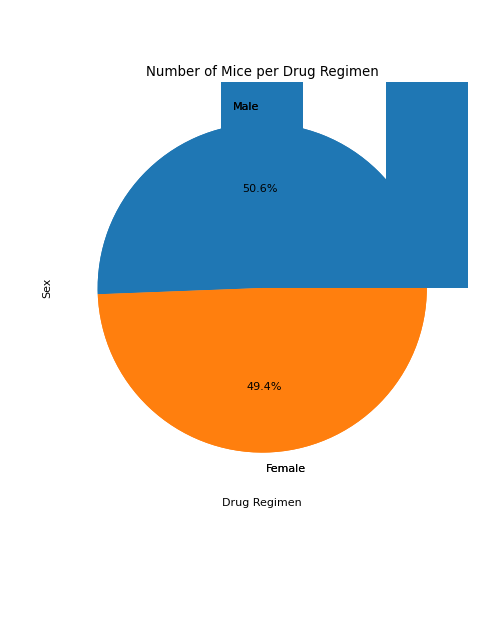

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pa_counts = combined_mouse_df.groupby('Drug Regimen')['Timepoint'].count()

#combined_mouse_df.

ax= pa_counts.plot.bar(color='b')

# add a title and axis labels
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')


plt.show()


In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
p_timpoint_group = combined_mouse_df.groupby('Drug Regimen')
p_timepoint_count = p_timpoint_group['Timepoint'].count()


count_chart = p_timepoint_count.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("timepoint_count")

plt.show()
plt.tight_layout()
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice per Drug Regimen')

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot=combined_mouse_df['Sex'].value_counts()
pie_plot.plot.pie()
pie_plot.plot.pie(autopct="%1.1f%%")
plt.show

<function matplotlib.pyplot.show(*, block=None)>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# p_sex_group = combined_mouse_df.groupby('Sex')
# p_sex_group_count = p_sex_group['Timepoint'].count()
# labels = p_sex_group_count['Sex']

# plt.pie('Sex', labels=labels, colors=colours,
#          autopct="%1.1f%%", shadow=True, startangle=140)
# plt.show()


NameError: name 'p_sex_group_count' is not defined

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
scatter_tv_tp


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_at_tv



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

